# CPSC 330 - Applied Machine Learning 

## Homework 5: Putting it all together 
### Associated lectures: All material till lecture 11

**Feb 26, 11:59pm: See the [Calendar](https://github.com/UBC-CS/cpsc330-2023W2/tree/main?tab=readme-ov-file#deliverable-due-dates-tentative).**

## Submission instructions <a name="si"></a>
<hr>

_points: 4_

You will receive marks for correctly submitting this assignment. To submit this assignment, follow the instructions below:

- **You may work on this assignment in a group (group size <= 4) and submit your assignment as a group.** 
- Below are some instructions on working as a group.  
    - The maximum group size is 4.
    - You can choose your own group members. 
    - Use group work as an opportunity to collaborate and learn new things from each other. 
    - Be respectful to each other and make sure you understand all the concepts in the assignment well. 
    - It's your responsibility to make sure that the assignment is submitted by one of the group members before the deadline. 
- Be sure to follow the [homework submission instructions](https://github.com/UBC-CS/cpsc330-2023W2/blob/main/docs/homework_instructions.md).

## Imports

In [58]:
import os

%matplotlib inline
import string
import sys

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

import os
import re
import sys
from hashlib import sha1

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
# import tests_hw5
from sklearn import datasets
from sklearn.compose import make_column_transformer
from sklearn.dummy import DummyClassifier, DummyRegressor
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.linear_model import LogisticRegression, Ridge
from sklearn.metrics import (
    accuracy_score,
    classification_report,
    confusion_matrix,
    f1_score,
    make_scorer,
    precision_score,
    recall_score,
)
from sklearn.model_selection import (
    GridSearchCV,
    RandomizedSearchCV,
    cross_val_score,
    cross_validate,
    train_test_split,
)
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, StandardScaler

## Introduction <a name="in"></a>

In this homework you will be working on an open-ended mini-project, where you will put all the different things you have learned so far together to solve an interesting problem.

A few notes and tips when you work on this mini-project: 

#### Tips
1. This mini-project is open-ended, and while working on it, there might be some situations where you'll have to use your own judgment and make your own decisions (as you would be doing when you work as a data scientist). Make sure you explain your decisions whenever necessary. 
2. **Do not include everything you ever tried in your submission** -- it's fine just to have your final code. That said, your code should be reproducible and well-documented. For example, if you chose your hyperparameters based on some hyperparameter optimization experiment, you should leave in the code for that experiment so that someone else could re-run it and obtain the same hyperparameters, rather than mysteriously just setting the hyperparameters to some (carefully chosen) values in your code. 
3. If you realize that you are repeating a lot of code try to organize it in functions. Clear presentation of your code, experiments, and results is the key to be successful in this lab. You may use code from lecture notes or previous lab solutions with appropriate attributions. 

#### Assessment
We plan to grade fairly and leniently. We don't have some secret target score that you need to achieve to get a good grade. **You'll be assessed on demonstration of mastery of course topics, clear presentation, and the quality of your analysis and results.** For example, if you just have a bunch of code and no text or figures, that's not good. If you do a bunch of sane things and get a lower accuracy than your friend, don't sweat it.


#### A final note
Finally, this style of this "project" question is different from other assignments. It'll be up to you to decide when you're "done" -- in fact, this is one of the hardest parts of real projects. But please don't spend WAY too much time on this... perhaps "a few hours". Of course if you're having fun you're welcome to spend as much time as you want! But, if so, try not to do it out of perfectionism or getting the best possible grade. Do it because you're learning and enjoying it. Students from the past cohorts have found such kind of labs useful and fun and I hope you enjoy it as well. 

<br><br>

<!-- BEGIN QUESTION -->

## 1. Pick your problem and explain the prediction problem <a name="1"></a>
<hr>

_points: 3_

In this mini project, you will be working on a classification problem of predicting whether a credit card client will default or not. 
For this problem, you will use [Default of Credit Card Clients Dataset](https://www.kaggle.com/uciml/default-of-credit-card-clients-dataset). In this data set, there are 30,000 examples and 24 features, and the goal is to estimate whether a person will default (fail to pay) their credit card bills; this column is labeled "default.payment.next.month" in the data. The rest of the columns can be used as features. You may take some ideas and compare your results with [the associated research paper](https://www.sciencedirect.com/science/article/pii/S0957417407006719), which is available through [the UBC library](https://www.library.ubc.ca/). 

**Your tasks:**

1. Spend some time understanding the problem and what each feature means. You can find this information in the documentation on [the dataset page on Kaggle](https://www.kaggle.com/uciml/default-of-credit-card-clients-dataset). Write a few sentences on your initial thoughts on the problem and the dataset. 
2. Download the dataset and read it as a pandas dataframe. 

<div class="alert alert-warning">
    
Solution_1
    
</div>

1. The tendency of a given credit card client to default on their credit card bills can likely be predicted by the amount of credit given (LIMIT_BAL), the education level (EDUCATION), age (AGE), past repayment statuses, and the ratio of previous payment to amount of bill statement. 

The EDUCATION columns has some unknown values, (EDUCATION = 5 and EDUCATION = 6), however, these only account for 331 out of 30000 rows. Therefore, we can drop the unknown rows since they make up relatively little of the data.

My initial thought is to use these columns to predict whether a person will default their credit card bills. 

<!-- END QUESTION -->

<br><br>

<!-- BEGIN QUESTION -->

## 2. Data splitting <a name="2"></a>
<hr>

_points: 2_

**Your tasks:**

1. Split the data into train (70%) and test (30%) portions with `random_state=76`.

> If your computer cannot handle training on 70% training data, make the test split bigger.  

<div class="alert alert-warning">
    
Solution_2
    
</div>

_Type your answer here, replacing this text._

In [59]:
credit_df = pd.read_csv("data/UCI_Credit_card.csv", header=0)
credit_df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


In [60]:
train_df, test_df = train_test_split(credit_df, test_size=0.7, random_state=76)

<!-- END QUESTION -->

<br><br>

<!-- BEGIN QUESTION -->

## 3. EDA <a name="3"></a>
<hr>

_points: 10_

**Your tasks:**

1. Perform exploratory data analysis on the train set.
2. Include at least two summary statistics and two visualizations that you find useful, and accompany each one with a sentence explaining it.
3. Summarize your initial observations about the data. 
4. Pick appropriate metric/metrics for assessment. 

<div class="alert alert-warning">
    
Solution_3
    
</div>

_Type your answer here, replacing this text._

In [61]:
## train_df.describe()
credit_summary = train_df.describe(include='all')
credit_summary 

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
count,9000.000000,9000.000000,9000.000000,9000.000000,9000.000000,9000.000000,9000.000000,9000.000000,9000.000000,9000.000000,...,9000.000000,9000.000000,9000.000000,9000.000000,9.000000e+03,9000.000000,9000.000000,9000.000000,9000.000000,9000.000000
mean,15194.157556,168161.777778,1.594333,1.858444,1.551889,35.467556,-0.007444,-0.145556,-0.174000,-0.226556,...,43295.907222,40407.420111,38808.556889,5647.029000,5.982081e+03,5288.390444,4907.212667,4644.601000,4952.923667,0.225444
std,8608.336368,130363.508483,0.491048,0.798630,0.518549,9.124021,1.133617,1.198738,1.200137,1.177966,...,63833.664392,60241.615321,59097.064395,17223.576454,2.215375e+04,17730.457702,17162.305899,15302.972908,15950.262151,0.417898
min,14.000000,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-170000.000000,-61372.000000,-94625.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,7795.750000,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2245.000000,1738.750000,1200.000000,990.000000,7.800000e+02,390.000000,281.250000,237.000000,122.750000,0.000000
50%,15297.500000,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,...,18991.000000,18070.000000,17119.500000,2133.000000,2.003000e+03,1848.000000,1500.000000,1500.000000,1500.000000,0.000000
75%,22624.000000,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,...,54410.000000,50013.500000,48873.250000,5044.250000,5.000000e+03,4754.250000,4100.000000,4093.250000,4033.250000,0.000000
max,29993.000000,800000.000000,2.000000,6.000000,3.000000,75.000000,8.000000,7.000000,8.000000,8.000000,...,628699.000000,524315.000000,527566.000000,873552.000000,1.215471e+06,889043.000000,621000.000000,426529.000000,528666.000000,1.000000


From the describe function we can see that the Limit Balance has a mean value of ~ $168 000 with a minimum of $10 000 and a maximum of $800 000. I anticipate this will be an important feature in the prediction of credit payment defaults. 

Across all 6 of the the repayment statuses, the maximum is 8, indicating a payment delay of 8 months.  


The mean payment amounts across the 6 months are 5647.029, 5.982081e+03, 5288.390444, 4907.212667, 4644.601000, and 4952.923667.

In [62]:
## Comparing limit balance to the sum of Repayment Statuses

## Select the columns of interest
selected_columns = ['LIMIT_BAL', 'PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'default.payment.next.month']

## Create a new DataFrame with selected columns
new_df = credit_df[selected_columns].copy()

## Summing the repayment status columns
new_df['SUM_PAY'] = new_df[['PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']].sum(axis=1)

## Selecting the columns of interest in the new DataFrame
new_df_new_col = new_df[['LIMIT_BAL', 'default.payment.next.month', 'SUM_PAY']].copy()

## Sorting the new DataFrame based on 'SUM_PAY'
sorted_df = new_df_new_col.sort_values(by='SUM_PAY')

## Displaying the new sorted DataFrame
sorted_df

,LIMIT_BAL,default.payment.next.month,SUM_PAY
22300,320000.0,0,-12
20607,260000.0,0,-12
28466,360000.0,0,-12
28465,240000.0,1,-12
20606,150000.0,0,-12
...,...,...,...
9979,30000.0,1,33
25869,510000.0,1,33
2362,20000.0,0,33
831,20000.0,0,33


From this dataframe we can see that extremely high limit balances tend to correspond to good repayment status. However, this is not always strictly true, as shown by the data point with a limit balance of $510 000 and a cumulative  repayment status of 33 over the six months for which repayments were logged.

In [63]:
## Calculate the ratios of PAY_AMT to BILL_AMT for each of the 6 months

## Create a list to store the names of the new columns
new_columns = []

## Create a new DataFrame with selected columns
new_df = credit_df.copy()

# Iterate over the months and calculate the ratio for each
for i in range(1, 7):
    # Calculate the ratio for the current month
    new_column_name = f'PAY_RATIO_{i}'
    new_df[new_column_name] = new_df[f'PAY_AMT{i}'] / new_df[f'BILL_AMT{i}']
    # Append the name of the new column to the list
    new_columns.append(new_column_name)

# Create a new DataFrame with the selected columns and the newly created columns
selected_columns = ['PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 
                    'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 
                    'default.payment.next.month']
new_df_with_ratios = new_df[selected_columns + new_columns].copy()

# Display the new DataFrame with the ratios
new_df_with_ratios

,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,default.payment.next.month,PAY_RATIO_1,PAY_RATIO_2,PAY_RATIO_3,PAY_RATIO_4,PAY_RATIO_5,PAY_RATIO_6
0,2,2,-1,-1,-2,-2,3913.0,3102.0,689.0,0.0,0.0,0.0,1,0.000000,0.222115,0.000000,NaN,NaN,NaN
1,-1,2,0,0,0,2,2682.0,1725.0,2682.0,3272.0,3455.0,3261.0,1,0.000000,0.579710,0.372856,0.305623,0.000000,0.613309
2,0,0,0,0,0,0,29239.0,14027.0,13559.0,14331.0,14948.0,15549.0,0,0.051917,0.106937,0.073752,0.069779,0.066899,0.321564
3,0,0,0,0,0,0,46990.0,48233.0,49291.0,28314.0,28959.0,29547.0,0,0.042562,0.041859,0.024345,0.038850,0.036914,0.033844
4,-1,0,-1,0,0,0,8617.0,5670.0,35835.0,20940.0,19146.0,19131.0,0,0.232099,6.469312,0.279057,0.429799,0.035987,0.035492
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,0,0,0,0,0,0,188948.0,192815.0,208365.0,88004.0,31237.0,15980.0,0,0.044986,0.103726,0.024011,0.034623,0.160067,0.062578
29996,-1,-1,-1,-1,0,0,1683.0,1828.0,3502.0,8979.0,5190.0,0.0,0,1.091503,1.928884,2.569389,0.014367,0.000000,NaN
29997,4,3,2,-1,0,0,3565.0,3356.0,2758.0,20878.0,20582.0,19357.0,1,0.000000,0.000000,7.976795,0.201169,0.097172,0.160149
29998,1,-1,0,0,0,-1,-1645.0,78379.0,76304.0,52774.0,11855.0,48944.0,1,-52.218845,0.043494,0.015438,0.036495,4.467651,0.036858


This dataframe has 6 extra columns for the ratio of amount previously paid to the amount of the bill statement. Theoretically, a higher ration is better. However, this ratio is meaningless for months that have 0 due or months in which the client has a negative amount due (overpaid). However, we can generally see fractions across the dataframe.

array([[<Axes: title={'center': 'AGE'}>]], dtype=object)

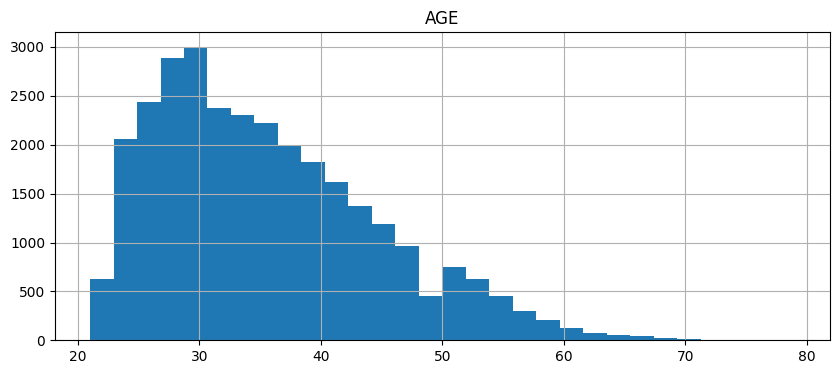

In [64]:
numeric_cols = ['AGE']

credit_df[numeric_cols].hist(bins=30, figsize=(10, 4))

From the histograms of age, it can be seen that most credit card clients are ~30 years of age. 

C:\Users\Heather\AppData\Local\Temp\ipykernel_14492\367585727.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_default_counts = credit_df_copy.groupby('Age_Bins')['default.payment.next.month'].sum()


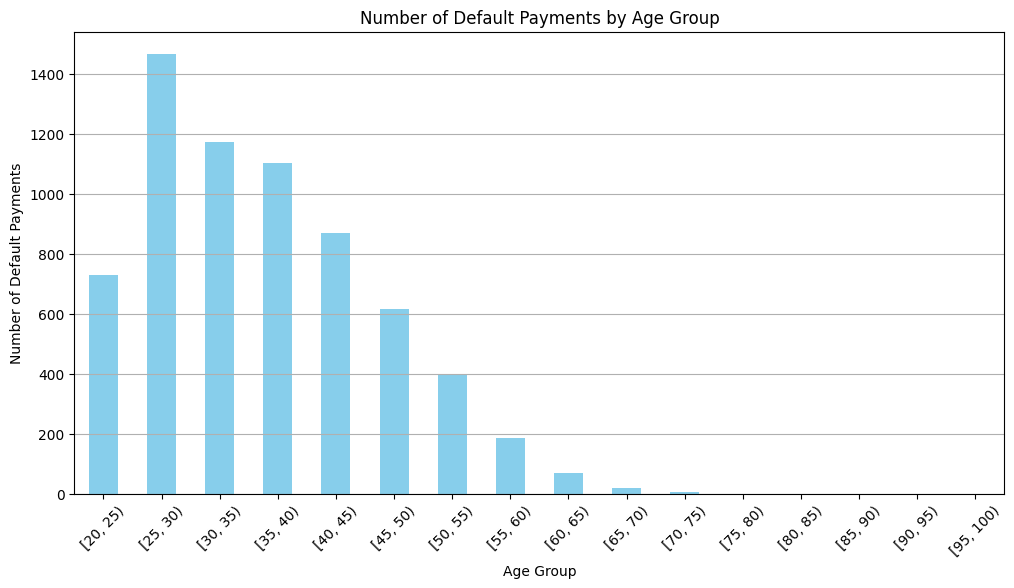

In [65]:
## Define age bins
age_bins = range(20, 101, 5)

## Create age bins and count the number of default payments for each bin
credit_df_copy = credit_df.copy()
credit_df_copy['Age_Bins'] = pd.cut(credit_df_copy['AGE'], bins=age_bins, right=False)
age_default_counts = credit_df_copy.groupby('Age_Bins')['default.payment.next.month'].sum()

## Plotting the bar plot
plt.figure(figsize=(12, 6))
age_default_counts.plot(kind='bar', color='skyblue')
plt.title('Number of Default Payments by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Number of Default Payments')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.grid(axis='y')
plt.show()

As we can see from this plot, it appears the payment defaults are correlated with age. Specifically, younger people tend to default more. However, the first age category (20-25) has significantly lower defaults than the the next bin. This is perhaps because when young people first get a credit card, they are more diligent in the first year or so, and then become complacent. 

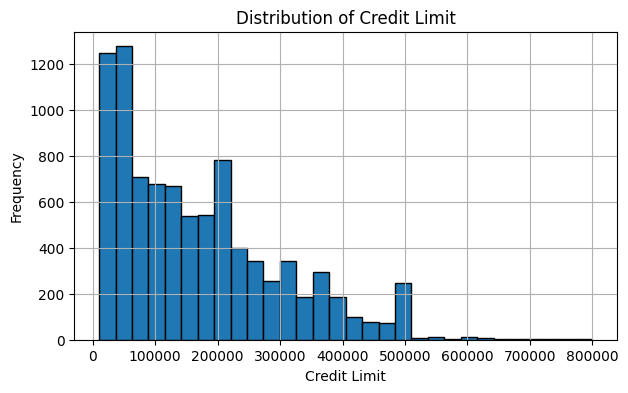

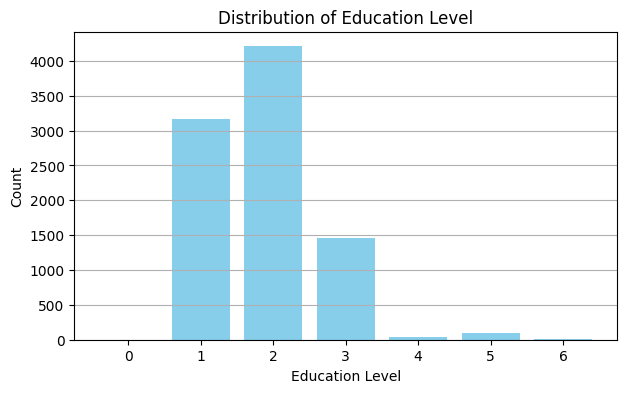

In [66]:
# Visualizations
# Histogram for LIMIT_BAL
plt.figure(figsize=(7, 4))
plt.hist(train_df['LIMIT_BAL'], bins=30, edgecolor='black')
plt.title('Distribution of Credit Limit')
plt.xlabel('Credit Limit')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

# Bar chart for EDUCATION
plt.figure(figsize=(7, 4))
education_counts = train_df['EDUCATION'].value_counts()
plt.bar(education_counts.index, education_counts.values, color='skyblue')
plt.title('Distribution of Education Level')
plt.xlabel('Education Level')
plt.ylabel('Count')
plt.grid(axis='y')
plt.show()

From the first plot we can see that most credit limits are around $100 000, and the plot is skewed right. 

As was mentioned above, relatively little data points are unclassified for Education, however, this plot serves as a visual representation of this claim. 

In [67]:
unknown_education_rows = credit_df[(credit_df['EDUCATION'] == 5) | (credit_df['EDUCATION'] == 6)]

# Get the number of rows with unknown education
num_unknown_education_rows = unknown_education_rows.shape[0]

print("Number of rows with unknown education:", num_unknown_education_rows)

Number of rows with unknown education: 331


<!-- END QUESTION -->

<br><br>

<!-- BEGIN QUESTION -->

## 4. Preprocessing and transformations <a name="5"></a>
<hr>

_points: 10_

**Your tasks:**

1. Identify different feature types and the transformations you would apply on each feature type. 
2. Define a column transformer, if necessary. 

<div class="alert alert-warning">
    
Solution_4
    
</div>

_Type your answer here, replacing this text._

In [68]:
## Drop rows where 'EDUCATION' is 5 or 6
credit_df_filtered = credit_df[(credit_df['EDUCATION'] != 5) & (credit_df['EDUCATION'] != 6)]
credit_df_filtered

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,29996,220000.0,1,3,1,39,0,0,0,0,...,88004.0,31237.0,15980.0,8500.0,20000.0,5003.0,3047.0,5000.0,1000.0,0
29996,29997,150000.0,1,3,2,43,-1,-1,-1,-1,...,8979.0,5190.0,0.0,1837.0,3526.0,8998.0,129.0,0.0,0.0,0
29997,29998,30000.0,1,2,2,37,4,3,2,-1,...,20878.0,20582.0,19357.0,0.0,0.0,22000.0,4200.0,2000.0,3100.0,1
29998,29999,80000.0,1,3,1,41,1,-1,0,0,...,52774.0,11855.0,48944.0,85900.0,3409.0,1178.0,1926.0,52964.0,1804.0,1


In [69]:
train_df, test_df = train_test_split(credit_df_filtered, test_size=0.7, random_state=76)

In [70]:
numeric_features = [
    'LIMIT_BAL',
    'AGE',
    'PAY_0',
    'PAY_2',
    'PAY_3',
    'PAY_4',
    'PAY_5',
    'PAY_6',
    'BILL_AMT1',
    'BILL_AMT2',
    'BILL_AMT3',
    'BILL_AMT4',
    'BILL_AMT5',
    'BILL_AMT6',
    'PAY_AMT1',
    'PAY_AMT2',
    'PAY_AMT3',
    'PAY_AMT4',
    'PAY_AMT5',
    'PAY_AMT6'
]
categorical_features = ['MARRIAGE']
ordinal_features = ['EDUCATION']
binary_features = ['SEX']
target = "default.payment.next.month"

In [71]:
X_train = train_df.drop(columns=["default.payment.next.month"])
y_train = train_df['default.payment.next.month']
X_test = test_df.drop(columns=["default.payment.next.month"])
y_test = test_df['default.payment.next.month']

In [72]:
## Define transformers for different feature types
numeric_transformer = StandardScaler()
categorical_transformer = OneHotEncoder(handle_unknown="ignore", sparse=False)
ordinal_transformer = OrdinalEncoder(dtype=int)
binary_transformer = OneHotEncoder(drop="if_binary", dtype=int)

In [73]:
## Create a sklearn ColumnTransformer named preprocessor
preprocessor = make_column_transformer(
    (numeric_transformer, numeric_features),
    (ordinal_transformer, ordinal_features),
    (binary_transformer, binary_features),
    (categorical_transformer, categorical_features),
)

## Transform the data 
transformed_df = pd.DataFrame(preprocessor.fit_transform(X_train))

c:\Users\Heather\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


<!-- END QUESTION -->

<br><br>

<!-- BEGIN QUESTION -->

## 5. Baseline model <a name="6"></a>
<hr>

_points: 2_

**Your tasks:**
1. Try `scikit-learn`'s baseline model and report results.

<div class="alert alert-warning">
    
Solution_5
    
</div>

In [74]:
# Baseline model
dummy = DummyClassifier(random_state = 42)
pipe = make_pipeline(preprocessor, dummy)
dummy_cross_val_results = pd.DataFrame(cross_validate(pipe, X_train, y_train, return_train_score=True))
dummy_cross_val_results

c:\Users\Heather\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
c:\Users\Heather\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
c:\Users\Heather\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
c:\Users\Heather\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\pr

,fit_time,score_time,test_score,train_score
0,0.019070,0.006000,0.771348,0.771348
1,0.017972,0.008962,0.771348,0.771348
2,0.017102,0.008403,0.771348,0.771348
3,0.016452,0.005999,0.771348,0.771348
4,0.015717,0.007000,0.771348,0.771348


The Dummy Classifier resulted in a test (validation) and train score of 0.771348 for each fold. This is because the Dummy model is predicting the majority class (the class with the highest frequency in the target variable) for all instances. This means about 77% of the data points are of the class 0 ("No default") and that the majority of instances in the training data correspond to individuals who do not default on their credit card payment next month. As we can see below, the majority class (0) is indeed 77.1348% and the majority class is 0.

Because the 0 / "No default" dominates the other class (1), there is an imbalance in the data.

In [75]:
## Count the occurrences of each class in y_train
class_counts = np.bincount(y_train)

## Find the class with the highest count (majority class)
majority_class = np.argmax(class_counts)

## Calculate the percentage of instances belonging to the majority class
majority_class_percentage = class_counts[majority_class] / len(y_train) * 100
majority_class_percentage

77.13483146067416

In [76]:
## Convert y_train to a pandas Series 
y_train_copy = y_train.copy()
y_train_series = pd.Series(y_train_copy)

## Determine the most frequent class
most_frequent_class = y_train_series.mode()[0]

print(f"The most frequent class is {most_frequent_class}.")

The most frequent class is 0.


<br><br>

<!-- BEGIN QUESTION -->

## 6. Linear models <a name="7"></a>
<hr>

_points 10_

**Your tasks:**

1. Try a linear model as a first real attempt. 
2. Carry out hyperparameter tuning to explore different values for the complexity hyperparameter. 
3. Report cross-validation scores along with standard deviation. 
4. Summarize your results.

<div class="alert alert-warning">
    
Solution_6
    
</div>

In [78]:
## Define the logistic regression model
lr = LogisticRegression(max_iter=1000, random_state=123)

## Perform cross-validation and store the results in a DataFrame
cross_val_results = pd.DataFrame(
    cross_validate(lr, X_train, y_train, return_train_score=True)
)

## Display the mean cross-validation scores
cross_val_results.mean()

fit_time       0.136046
score_time     0.002153
test_score     0.771461
train_score    0.771264
dtype: float64

1. The first attempt at linear modelling resulted in a test score of 0.771. This is not better than the Dummy model, so we will try hyperparamter tuning next.

In [93]:
## Define the logistic regression model
lr = LogisticRegression(max_iter=1000, random_state=123)

## Define hyperparameters to tune
C_vals = 10.0 ** np.arange(-2, 3, 0.1)

## Create GridSearchCV object
param_grid = {'C': C_vals}
grid_search = GridSearchCV(lr, param_grid, cv=5) 

## Fit GridSearchCV to the data
grid_search.fit(X_train, y_train)

## Get the best value of C after fitting
best_C = grid_search.best_params_['C']

## Report best hyperparameters and corresponding cross-validation scores
print("Best C hyperparameter:", best_C)
print("Best cross-validation accuracy:", grid_search.best_score_)


Best C hyperparameter: 0.025118864315095822
Best cross-validation accuracy: 0.7715730337078652


In [94]:
# Define the logistic regression model with the best C value
lr_with_best_C = LogisticRegression(C=best_C, max_iter=1000, random_state=123)

# Perform cross-validation and store the results in a DataFrame
cross_val_results = pd.DataFrame(
    cross_validate(lr_with_best_C, X_train, y_train, return_train_score=True)
)

# Display the mean cross-validation scores
cross_val_results['std_test_score'] = cross_val_results['test_score'].std()
cross_val_results

,fit_time,score_time,test_score,train_score,std_test_score
0,0.258155,0.000000,0.771348,0.771348,0.000308
1,0.217747,0.002003,0.771348,0.771348,0.000308
2,0.182071,0.001999,0.771348,0.771348,0.000308
3,0.062706,0.001999,0.771910,0.771208,0.000308
4,0.089019,0.002000,0.771910,0.771067,0.000308


2. With hyperparameter tuning, the test score did not improve. This could be because not enough C values were tested in hyperparameter tuning.
3. Cross-validation scores along with standard deviation reported above.

4. Summarize your results.

Logistic Regression did not perform better than the Dummy Classifier, even with hyperparameter tuning. 

<!-- END QUESTION -->

<br><br>

<!-- BEGIN QUESTION -->

## 7. Different models <a name="8"></a>
<hr>

_points: 12_

**Your tasks:**
1. Try at least 3 other models aside from a linear model. One of these models should be a tree-based ensemble model. 
2. Summarize your results in terms of overfitting/underfitting and fit and score times. Can you beat a linear model? 

<div class="alert alert-warning">
    
Solution_7
    
</div>

In [99]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

In [100]:
models = {
    "decision tree": DecisionTreeClassifier(random_state=42),
    "kNN": KNeighborsClassifier(),
    "RBF SVM": SVC(random_state=42),
}

In [107]:
default_pred_results = []

for model_name, model_instance in models.items():
    ## Create a pipeline with the model 
    pipe = make_pipeline(preprocessor, model_instance)

    ## 5-fold cross validation 
    cross_val_results = cross_validate(pipe, X_train, y_train, return_train_score=True)

    # Extract the cross-validation results
    cv_results_dict = {
        "Model": model_name,
        "Mean Train Score": cross_val_results["train_score"].mean(),
        "Mean Test Score": cross_val_results["test_score"].mean(),
        "Std Train Score": cross_val_results["train_score"].std(),
        "Std Test Score": cross_val_results["test_score"].std(),
        "Fit Time": cross_val_results["fit_time"].mean(),
        "Score Time": cross_val_results["score_time"].mean(),
    }
    
    # Append the results to the list
    default_pred_results.append(cv_results_dict)

# Create a DataFrame from the list of dictionaries
default_pred_results_df = pd.DataFrame(default_pred_results)

default_pred_results_df


c:\Users\Heather\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
c:\Users\Heather\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
c:\Users\Heather\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
c:\Users\Heather\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\pr

c:\Users\Heather\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
c:\Users\Heather\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
c:\Users\Heather\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
c:\Users\Heather\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\pr

,Model,Mean Train Score,Mean Test Score,Std Train Score,Std Test Score,Fit Time,Score Time
0,decision tree,0.999803,0.721685,0.000069,0.009571,0.413759,0.007088
1,kNN,0.836966,0.779775,0.002295,0.003892,0.017577,0.056690
2,RBF SVM,0.820590,0.813371,0.001355,0.005178,5.374908,1.513660


Using the Decision Tree, the mean test score did not improve much from the Dummy and Logistic Models, but the mean train score rose to 0.9998, indicating extreme over-fitting. This is not suprising considering no max_depth parameter was used. 

The kNN model provided more promising results; the mean test score is 0.7798 and the mean train score was more reasonable at only 0.837. 

The SVM Model had the highest mean test score of 0.81 and reasonable mean train score of 0.82. The closeness in teh train and test scores indicates that the model generalizes well to unseen data, achieving a similar performance on both the training and test sets.

<!-- END QUESTION -->

<br><br>

<!-- END QUESTION -->

<br><br>

<!-- BEGIN QUESTION -->

## 8. Hyperparameter optimization <a name="10"></a>
<hr>

_points: 10_

**Your tasks:**

Make some attempts to optimize hyperparameters for the models you've tried and summarize your results. In at least one case you should be optimizing multiple hyperparameters for a single model. You may use `sklearn`'s methods for hyperparameter optimization or fancier Bayesian optimization methods. 
  - [GridSearchCV](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html)   
  - [RandomizedSearchCV](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.RandomizedSearchCV.html)
  - [scikit-optimize](https://github.com/scikit-optimize/scikit-optimize) 

<div class="alert alert-warning">
    
Solution_8
    
</div>

_Type your answer here, replacing this text._

<!-- END QUESTION -->

<br><br>

<!-- END QUESTION -->

<br><br>

<!-- BEGIN QUESTION -->

## 9. Results on the test set <a name="12"></a>
<hr>

_points: 10_

**Your tasks:**

1. Try your best performing model on the test data: report and explain test scores.
2. Do the test scores agree with the validation scores from before? To what extent do you trust your results? Do you think you've had issues with optimization bias?

<div class="alert alert-warning">
    
Solution_9
    
</div>

_Type your answer here, replacing this text._

<!-- END QUESTION -->

<br><br>

<!-- BEGIN QUESTION -->

## 10. Summary of results <a name="13"></a>
<hr>

_points 12_

Imagine that you want to present the summary of these results to your boss and co-workers. 

**Your tasks:**

1. Create a table (printed `DataFrame`) summarizing important results. 
2. Write concluding remarks.
3. Discuss other ideas that you did not try but could potentially improve the performance/interpretability . 
3. Report your final test score along with the metric you used at the top of this notebook in the [Submission instructions section](#si).

<div class="alert alert-warning">
    
Solution_10
    
</div>

_Type your answer here, replacing this text._

<!-- END QUESTION -->

<br><br>

<!-- END QUESTION -->

<br><br>

**PLEASE READ:** When you are ready to submit your assignment do the following:

1. Run all cells in your notebook to make sure there are no errors by doing `Kernel -> Restart Kernel and Clear All Outputs` and then `Run -> Run All Cells`. 
2. Notebooks with cell execution numbers out of order or not starting from “1” will have marks deducted. Notebooks without the output displayed may not be graded at all (because we need to see the output in order to grade your work).
3. Upload the assignment using [PrairieLearn](https://ca.prairielearn.com/pl/course_instance/6697). Don't forget to rename your file `hw4_sol.ipynb`.

This was a tricky one but you did it!

![](img/eva-well-done.png)